In [ ]:
import pandas as pd
from urllib.request import urlopen
from pgmpy.models import BayesianModel
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00


In [ ]:
uploaded = files.upload()
#file_path = 'data 2.csv'
data = pd.read_csv('discretized_data.csv')

Saving discretized_data.csv to discretized_data.csv


In [ ]:
data.head()

,id,diagnosis,radius_mean_discrete,texture_mean_discrete,perimeter_mean_discrete,area_mean_discrete,smoothness_mean_discrete,compactness_mean_discrete,concavity_mean_discrete,concave points_mean_discrete,...,radius_worst_discrete,texture_worst_discrete,perimeter_worst_discrete,area_worst_discrete,smoothness_worst_discrete,compactness_worst_discrete,concavity_worst_discrete,concave points_worst_discrete,symmetry_worst_discrete,fractal_dimension_worst_discrete
0,842302,1,Medium,Low,Medium,Medium,Medium,High,High,High,...,Medium,Low,High,Medium,Medium,Medium,Medium,High,Medium,Medium
1,842517,1,Medium,Low,Medium,Medium,Low,Low,Low,Medium,...,Medium,Low,Medium,Medium,Medium,Low,Low,Medium,Low,Low
2,84300903,1,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,High,Medium,Low
3,84348301,1,Low,Medium,Low,Low,High,High,Medium,Medium,...,Low,Medium,Low,Low,High,High,Medium,High,High,High
4,84358402,1,Medium,Low,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Low,Medium,Medium,Medium,Low,Low,Medium,Low,Low


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork


In [ ]:
print(data.columns)


Index(['id', 'diagnosis', 'radius_mean_discrete', 'texture_mean_discrete',
       'perimeter_mean_discrete', 'area_mean_discrete',
       'smoothness_mean_discrete', 'compactness_mean_discrete',
       'concavity_mean_discrete', 'concave points_mean_discrete',
       'symmetry_mean_discrete', 'fractal_dimension_mean_discrete',
       'radius_se_discrete', 'texture_se_discrete', 'perimeter_se_discrete',
       'area_se_discrete', 'smoothness_se_discrete', 'compactness_se_discrete',
       'concavity_se_discrete', 'concave points_se_discrete',
       'symmetry_se_discrete', 'fractal_dimension_se_discrete',
       'radius_worst_discrete', 'texture_worst_discrete',
       'perimeter_worst_discrete', 'area_worst_discrete',
       'smoothness_worst_discrete', 'compactness_worst_discrete',
       'concavity_worst_discrete', 'concave points_worst_discrete',
       'symmetry_worst_discrete', 'fractal_dimension_worst_discrete'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.replace(' ', '_')


In [ ]:
model = BayesianNetwork([
    ('diagnosis', 'radius_mean_discrete'),
    ('diagnosis', 'texture_mean_discrete'),
    ('diagnosis', 'perimeter_mean_discrete'),
    ('diagnosis', 'area_mean_discrete'),
    ('diagnosis', 'smoothness_mean_discrete'),
    ('diagnosis', 'compactness_mean_discrete'),
    ('diagnosis', 'concavity_mean_discrete'),
    ('diagnosis', 'concave_points_mean_discrete'),  # Update name
    ('diagnosis', 'symmetry_mean_discrete'),
    ('diagnosis', 'fractal_dimension_mean_discrete'),
    # Mean -> SE and Worst
    ('radius_mean_discrete', 'radius_se_discrete'),
    ('radius_mean_discrete', 'radius_worst_discrete'),
    ('texture_mean_discrete', 'texture_se_discrete'),
    ('texture_mean_discrete', 'texture_worst_discrete'),
    ('perimeter_mean_discrete', 'perimeter_se_discrete'),
    ('perimeter_mean_discrete', 'perimeter_worst_discrete'),
    ('area_mean_discrete', 'area_se_discrete'),
    ('area_mean_discrete', 'area_worst_discrete'),
    ('smoothness_mean_discrete', 'smoothness_se_discrete'),
    ('smoothness_mean_discrete', 'smoothness_worst_discrete'),
    ('compactness_mean_discrete', 'compactness_se_discrete'),
    ('compactness_mean_discrete', 'compactness_worst_discrete'),
    ('concavity_mean_discrete', 'concavity_se_discrete'),
    ('concavity_mean_discrete', 'concavity_worst_discrete'),
    ('concave_points_mean_discrete', 'concave_points_se_discrete'),  # Update name
    ('concave_points_mean_discrete', 'concave_points_worst_discrete'),  # Update name
    ('symmetry_mean_discrete', 'symmetry_se_discrete'),
    ('symmetry_mean_discrete', 'symmetry_worst_discrete'),
    ('fractal_dimension_mean_discrete', 'fractal_dimension_se_discrete'),
    ('fractal_dimension_mean_discrete', 'fractal_dimension_worst_discrete'),
    # SE -> Worst
    ('radius_se_discrete', 'radius_worst_discrete'),
    ('texture_se_discrete', 'texture_worst_discrete'),
    ('perimeter_se_discrete', 'perimeter_worst_discrete'),
    ('area_se_discrete', 'area_worst_discrete'),
    ('smoothness_se_discrete', 'smoothness_worst_discrete'),
    ('compactness_se_discrete', 'compactness_worst_discrete'),
    ('concavity_se_discrete', 'concavity_worst_discrete'),
    ('concave_points_se_discrete', 'concave_points_worst_discrete'),  # Update name
    ('symmetry_se_discrete', 'symmetry_worst_discrete'),
    ('fractal_dimension_se_discrete', 'fractal_dimension_worst_discrete'),
])


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(data, estimator=MaximumLikelihoodEstimator)


In [ ]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)

query_result = inference.query(variables=['radius_mean_discrete'], evidence={'diagnosis': 1})
print(query_result)


+------------------------------+-----------------------------+
| radius_mean_discrete         |   phi(radius_mean_discrete) |
+==============================+=============================+
| radius_mean_discrete(High)   |                      0.1038 |
+------------------------------+-----------------------------+
| radius_mean_discrete(Low)    |                      0.1509 |
+------------------------------+-----------------------------+
| radius_mean_discrete(Medium) |                      0.7453 |
+------------------------------+-----------------------------+


In [ ]:
query_result = inference.query(variables=['texture_mean_discrete'], evidence={'diagnosis': 1})
print("the probability of 'texture_mean_discrete' given 'diagnosis' = 1")
print(query_result)

query_result = inference.query(variables=['compactness_mean_discrete'], evidence={'diagnosis': 0})
print("\nthe probability of 'compactness_mean_discrete' given 'diagnosis' = 0")
print(query_result)

query_result = inference.query(variables=['symmetry_mean_discrete'], evidence={'diagnosis': 1})
print("\nthe probability of 'symmetry_mean_discrete' given 'diagnosis' = 1")
print(query_result)


the probability of 'texture_mean_discrete' given 'diagnosis' = 1
+-------------------------------+------------------------------+
| texture_mean_discrete         |   phi(texture_mean_discrete) |
+===============================+==============================+
| texture_mean_discrete(High)   |                       0.0283 |
+-------------------------------+------------------------------+
| texture_mean_discrete(Low)    |                       0.2736 |
+-------------------------------+------------------------------+
| texture_mean_discrete(Medium) |                       0.6981 |
+-------------------------------+------------------------------+

the probability of 'compactness_mean_discrete' given 'diagnosis' = 0
+-----------------------------------+----------------------------------+
| compactness_mean_discrete         |   phi(compactness_mean_discrete) |
+===================================+==================================+
| compactness_mean_discrete(High)   |                        

#### Querying Standard Error (SE) Variables

In [ ]:
query_result = inference.query(variables=['radius_se_discrete'], evidence={'diagnosis': 0})
print("the probability of 'radius_se_discrete' given 'diagnosis' = 0")
print(query_result)

query_result = inference.query(variables=['texture_se_discrete'], evidence={'diagnosis': 1})
print("\nthe probability of 'texture_se_discrete' given 'diagnosis' = 1")
print(query_result)

query_result = inference.query(variables=['concavity_se_discrete'], evidence={'diagnosis': 1})
print("\nthe probability of 'concavity_se_discrete' given 'diagnosis' = 1")
print(query_result)


the probability of 'radius_se_discrete' given 'diagnosis' = 0
+----------------------------+---------------------------+
| radius_se_discrete         |   phi(radius_se_discrete) |
+============================+===========================+
| radius_se_discrete(High)   |                    0.0000 |
+----------------------------+---------------------------+
| radius_se_discrete(Low)    |                    0.9932 |
+----------------------------+---------------------------+
| radius_se_discrete(Medium) |                    0.0068 |
+----------------------------+---------------------------+

the probability of 'texture_se_discrete' given 'diagnosis' = 1
+-----------------------------+----------------------------+
| texture_se_discrete         |   phi(texture_se_discrete) |
+=============================+============================+
| texture_se_discrete(High)   |                     0.0095 |
+-----------------------------+----------------------------+
| texture_se_discrete(Low)    |       

####Querying Worst Case Variables



In [ ]:
query_result = inference.query(variables=['radius_worst_discrete'], evidence={'diagnosis': 1})
print("the probability of 'radius_worst_discrete' given 'diagnosis' = 1")
print(query_result)

query_result = inference.query(variables=['texture_worst_discrete'], evidence={'diagnosis': 0})
print("\nthe probability of 'texture_worst_discrete' given 'diagnosis' = 0")
print(query_result)

query_result = inference.query(variables=['compactness_worst_discrete'], evidence={'diagnosis': 1})
print("\nthe probability of 'compactness_worst_discrete' given 'diagnosis' = 1")
print(query_result)


the probability of 'radius_worst_discrete' given 'diagnosis' = 1
+-------------------------------+------------------------------+
| radius_worst_discrete         |   phi(radius_worst_discrete) |
+===============================+==============================+
| radius_worst_discrete(High)   |                       0.0897 |
+-------------------------------+------------------------------+
| radius_worst_discrete(Low)    |                       0.3564 |
+-------------------------------+------------------------------+
| radius_worst_discrete(Medium) |                       0.5538 |
+-------------------------------+------------------------------+

the probability of 'texture_worst_discrete' given 'diagnosis' = 0
+--------------------------------+-------------------------------+
| texture_worst_discrete         |   phi(texture_worst_discrete) |
+================================+===============================+
| texture_worst_discrete(High)   |                        0.0259 |
+--------------

In [ ]:
print("Nodes in the model:", model.nodes())
print("Edges in the model:", model.edges())


Nodes in the model: ['diagnosis', 'radius_mean_discrete', 'texture_mean_discrete', 'perimeter_mean_discrete', 'area_mean_discrete', 'smoothness_mean_discrete', 'compactness_mean_discrete', 'concavity_mean_discrete', 'concave_points_mean_discrete', 'symmetry_mean_discrete', 'fractal_dimension_mean_discrete', 'radius_se_discrete', 'radius_worst_discrete', 'texture_se_discrete', 'texture_worst_discrete', 'perimeter_se_discrete', 'perimeter_worst_discrete', 'area_se_discrete', 'area_worst_discrete', 'smoothness_se_discrete', 'smoothness_worst_discrete', 'compactness_se_discrete', 'compactness_worst_discrete', 'concavity_se_discrete', 'concavity_worst_discrete', 'concave_points_se_discrete', 'concave_points_worst_discrete', 'symmetry_se_discrete', 'symmetry_worst_discrete', 'fractal_dimension_se_discrete', 'fractal_dimension_worst_discrete']
Edges in the model: [('diagnosis', 'radius_mean_discrete'), ('diagnosis', 'texture_mean_discrete'), ('diagnosis', 'perimeter_mean_discrete'), ('diagnos

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
nx_graph = nx.DiGraph()

nx_graph.add_nodes_from(model.nodes())
nx_graph.add_edges_from(model.edges())

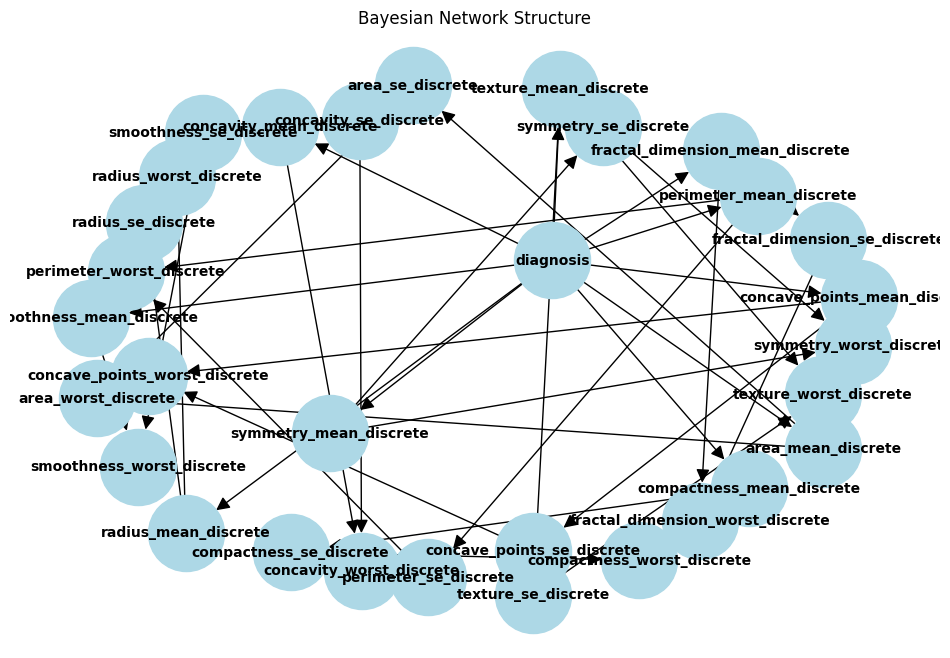

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Bayesian Network Structure")

pos = nx.spring_layout(nx_graph, k=2)  # Adjust 'k' for spacing
nx.draw(nx_graph, pos=pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)

plt.show()